In [1]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from statsforecast import StatsForecast
from statsforecast.models import AutoTheta, SeasonalNaive
import warnings

warnings.filterwarnings("ignore")

_session_dir = Path(os.getcwd()).parent

print(datetime.now())

/Users/jorge/Documents/vaforecast/.venv/lib/python3.11/site-packages/statsforecast/core.py:26: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
/Users/jorge/Documents/vaforecast/.venv/lib/python3.11/site-packages/statsforecast/utils.py:237: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "ds": pd.date_range(start="1949-01-01", periods=len(AirPassengers), freq="M"),


2024-03-07 16:18:34.189240


In [2]:
dengue = pd.read_csv(_session_dir / "data" / "dengue_singapur_2012_2020.csv", index_col=0, parse_dates=['start_date', 'end_date'])
dengue.head()

,epidemiology_weeks,start_date,end_date,dengue,year
0,1,2012-01-01,2012-01-07,74,2012
1,2,2012-01-08,2012-01-14,64,2012
2,3,2012-01-15,2012-01-21,60,2012
3,4,2012-01-22,2012-01-28,50,2012
4,5,2012-01-29,2012-02-04,84,2012


In [3]:
df = dengue.assign(unique_id='dengue', ds=dengue.end_date, y=dengue.dengue)[['unique_id','ds','y']].copy()
df['y'] = np.log(df['y'])
df.head()

,unique_id,ds,y
0,dengue,2012-01-07,4.304065
1,dengue,2012-01-14,4.158883
2,dengue,2012-01-21,4.094345
3,dengue,2012-01-28,3.912023
4,dengue,2012-02-04,4.430817


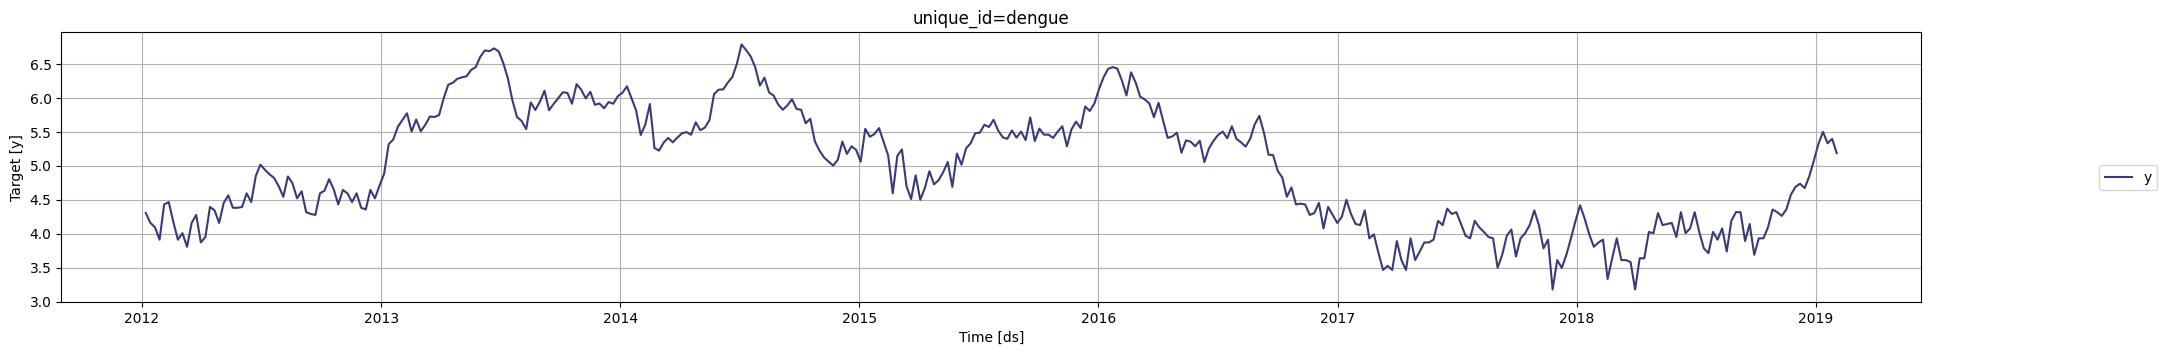

In [6]:
_dates = df['ds'].unique()
_dtrain = _dates[:-100]
_dtest = _dates[-100:]
y_train = df.query('ds in @_dtrain')
y_test = df.query('ds in @_dtest') 

StatsForecast.plot()

In [5]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 370 entries, 0 to 4
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   unique_id  370 non-null    object        
 1   ds         370 non-null    datetime64[ns]
 2   y          370 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 11.6+ KB
